In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/HR_Dataset.csv')

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [4]:
df.info

<bound method DataFrame.info of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2      

In [5]:
df.shape

(14999, 10)

In [6]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments               object
salary                    object
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [8]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [9]:
df_numeric = df.select_dtypes(include ="object").head()

In [10]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [11]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

False

In [12]:
df.groupby(["left"])["satisfaction_level"].value_counts()

left  satisfaction_level
0     0.50                  226
      0.66                  217
      0.59                  212
      0.69                  209
      0.49                  207
                           ... 
1     0.26                    1
      0.29                    1
      0.65                    1
      0.67                    1
      0.68                    1
Name: satisfaction_level, Length: 170, dtype: int64

In [13]:
df.groupby(["left"])["satisfaction_level"].value_counts(normalize=True)

left  satisfaction_level
0     0.50                  0.019776
      0.66                  0.018988
      0.59                  0.018551
      0.69                  0.018288
      0.49                  0.018113
                              ...   
1     0.26                  0.000280
      0.29                  0.000280
      0.65                  0.000280
      0.67                  0.000280
      0.68                  0.000280
Name: satisfaction_level, Length: 170, dtype: float64

In [14]:
df.groupby(["left"])["number_project"].value_counts()

left  number_project
0     3                 3983
      4                 3956
      5                 2149
      2                  821
      6                  519
1     2                 1567
      6                  655
      5                  612
      4                  409
      7                  256
      3                   72
Name: number_project, dtype: int64

In [15]:
df.groupby(["left"])["number_project"].value_counts(normalize=True)

left  number_project
0     3                 0.348530
      4                 0.346167
      5                 0.188047
      2                 0.071841
      6                 0.045415
1     2                 0.438813
      6                 0.183422
      5                 0.171381
      4                 0.114534
      7                 0.071689
      3                 0.020162
Name: number_project, dtype: float64

In [16]:
df.groupby(["left"])["average_montly_hours"].value_counts()

left  average_montly_hours
0     224                     102
      173                      96
      149                      94
      162                      94
      167                      94
                             ... 
1     178                       1
      188                       1
      196                       1
      203                       1
      204                       1
Name: average_montly_hours, Length: 356, dtype: int64

In [17]:
df.groupby(["left"])["average_montly_hours"].value_counts(normalize=True)

left  average_montly_hours
0     224                     0.008925
      173                     0.008400
      149                     0.008225
      162                     0.008225
      167                     0.008225
                                ...   
1     178                     0.000280
      188                     0.000280
      196                     0.000280
      203                     0.000280
      204                     0.000280
Name: average_montly_hours, Length: 356, dtype: float64

In [18]:
df.groupby(["left"])["last_evaluation"].value_counts()

left  last_evaluation
0     0.74               251
      0.59               249
      0.55               248
      0.67               239
      0.64               235
                        ... 
1     0.72                 3
      0.73                 3
      0.61                 2
      0.66                 2
      0.76                 2
Name: last_evaluation, Length: 119, dtype: int64

In [19]:
df.groupby(["left"])["last_evaluation"].value_counts(normalize=True)

left  last_evaluation
0     0.74               0.021964
      0.59               0.021789
      0.55               0.021701
      0.67               0.020914
      0.64               0.020564
                           ...   
1     0.72               0.000840
      0.73               0.000840
      0.61               0.000560
      0.66               0.000560
      0.76               0.000560
Name: last_evaluation, Length: 119, dtype: float64

In [20]:
df.groupby(["left"])["salary"].value_counts()

left  salary
0     low       5144
      medium    5129
      high      1155
1     low       2172
      medium    1317
      high        82
Name: salary, dtype: int64

In [21]:
df.groupby(["left"])["salary"].value_counts(normalize=True)

left  salary
0     low       0.450123
      medium    0.448810
      high      0.101068
1     low       0.608233
      medium    0.368804
      high      0.022963
Name: salary, dtype: float64

In [22]:
df.groupby(["left"])["Departments "].value_counts()

left  Departments 
0     sales           3126
      technical       2023
      support         1674
      IT               954
      product_mng      704
      RandD            666
      marketing        655
      accounting       563
      management       539
      hr               524
1     sales           1014
      technical        697
      support          555
      IT               273
      hr               215
      accounting       204
      marketing        203
      product_mng      198
      RandD            121
      management        91
Name: Departments , dtype: int64

In [23]:
df.groupby(["left"])["Departments "].value_counts(normalize=True)

left  Departments 
0     sales           0.273539
      technical       0.177021
      support         0.146482
      IT              0.083479
      product_mng     0.061603
      RandD           0.058278
      marketing       0.057315
      accounting      0.049265
      management      0.047165
      hr              0.045852
1     sales           0.283954
      technical       0.195183
      support         0.155419
      IT              0.076449
      hr              0.060207
      accounting      0.057127
      marketing       0.056847
      product_mng     0.055447
      RandD           0.033884
      management      0.025483
Name: Departments , dtype: float64

In [24]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
df.corr().style.background_gradient(cmap = 'inferno')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


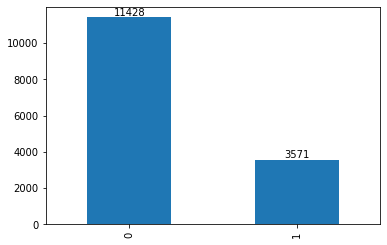

In [26]:
ax = df['left'].value_counts().plot(kind ="bar")

ax.bar_label(ax.containers[0]);

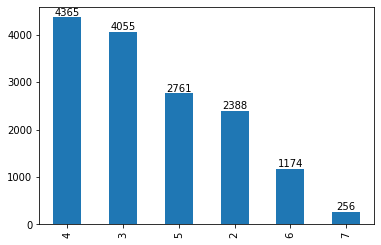

In [27]:
ax = df['number_project'].value_counts().plot(kind ="bar")

ax.bar_label(ax.containers[0]);

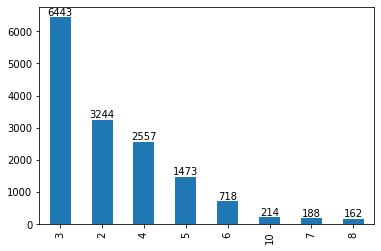

In [28]:
ax = df['time_spend_company'].value_counts().plot(kind ="bar")

ax.bar_label(ax.containers[0]);

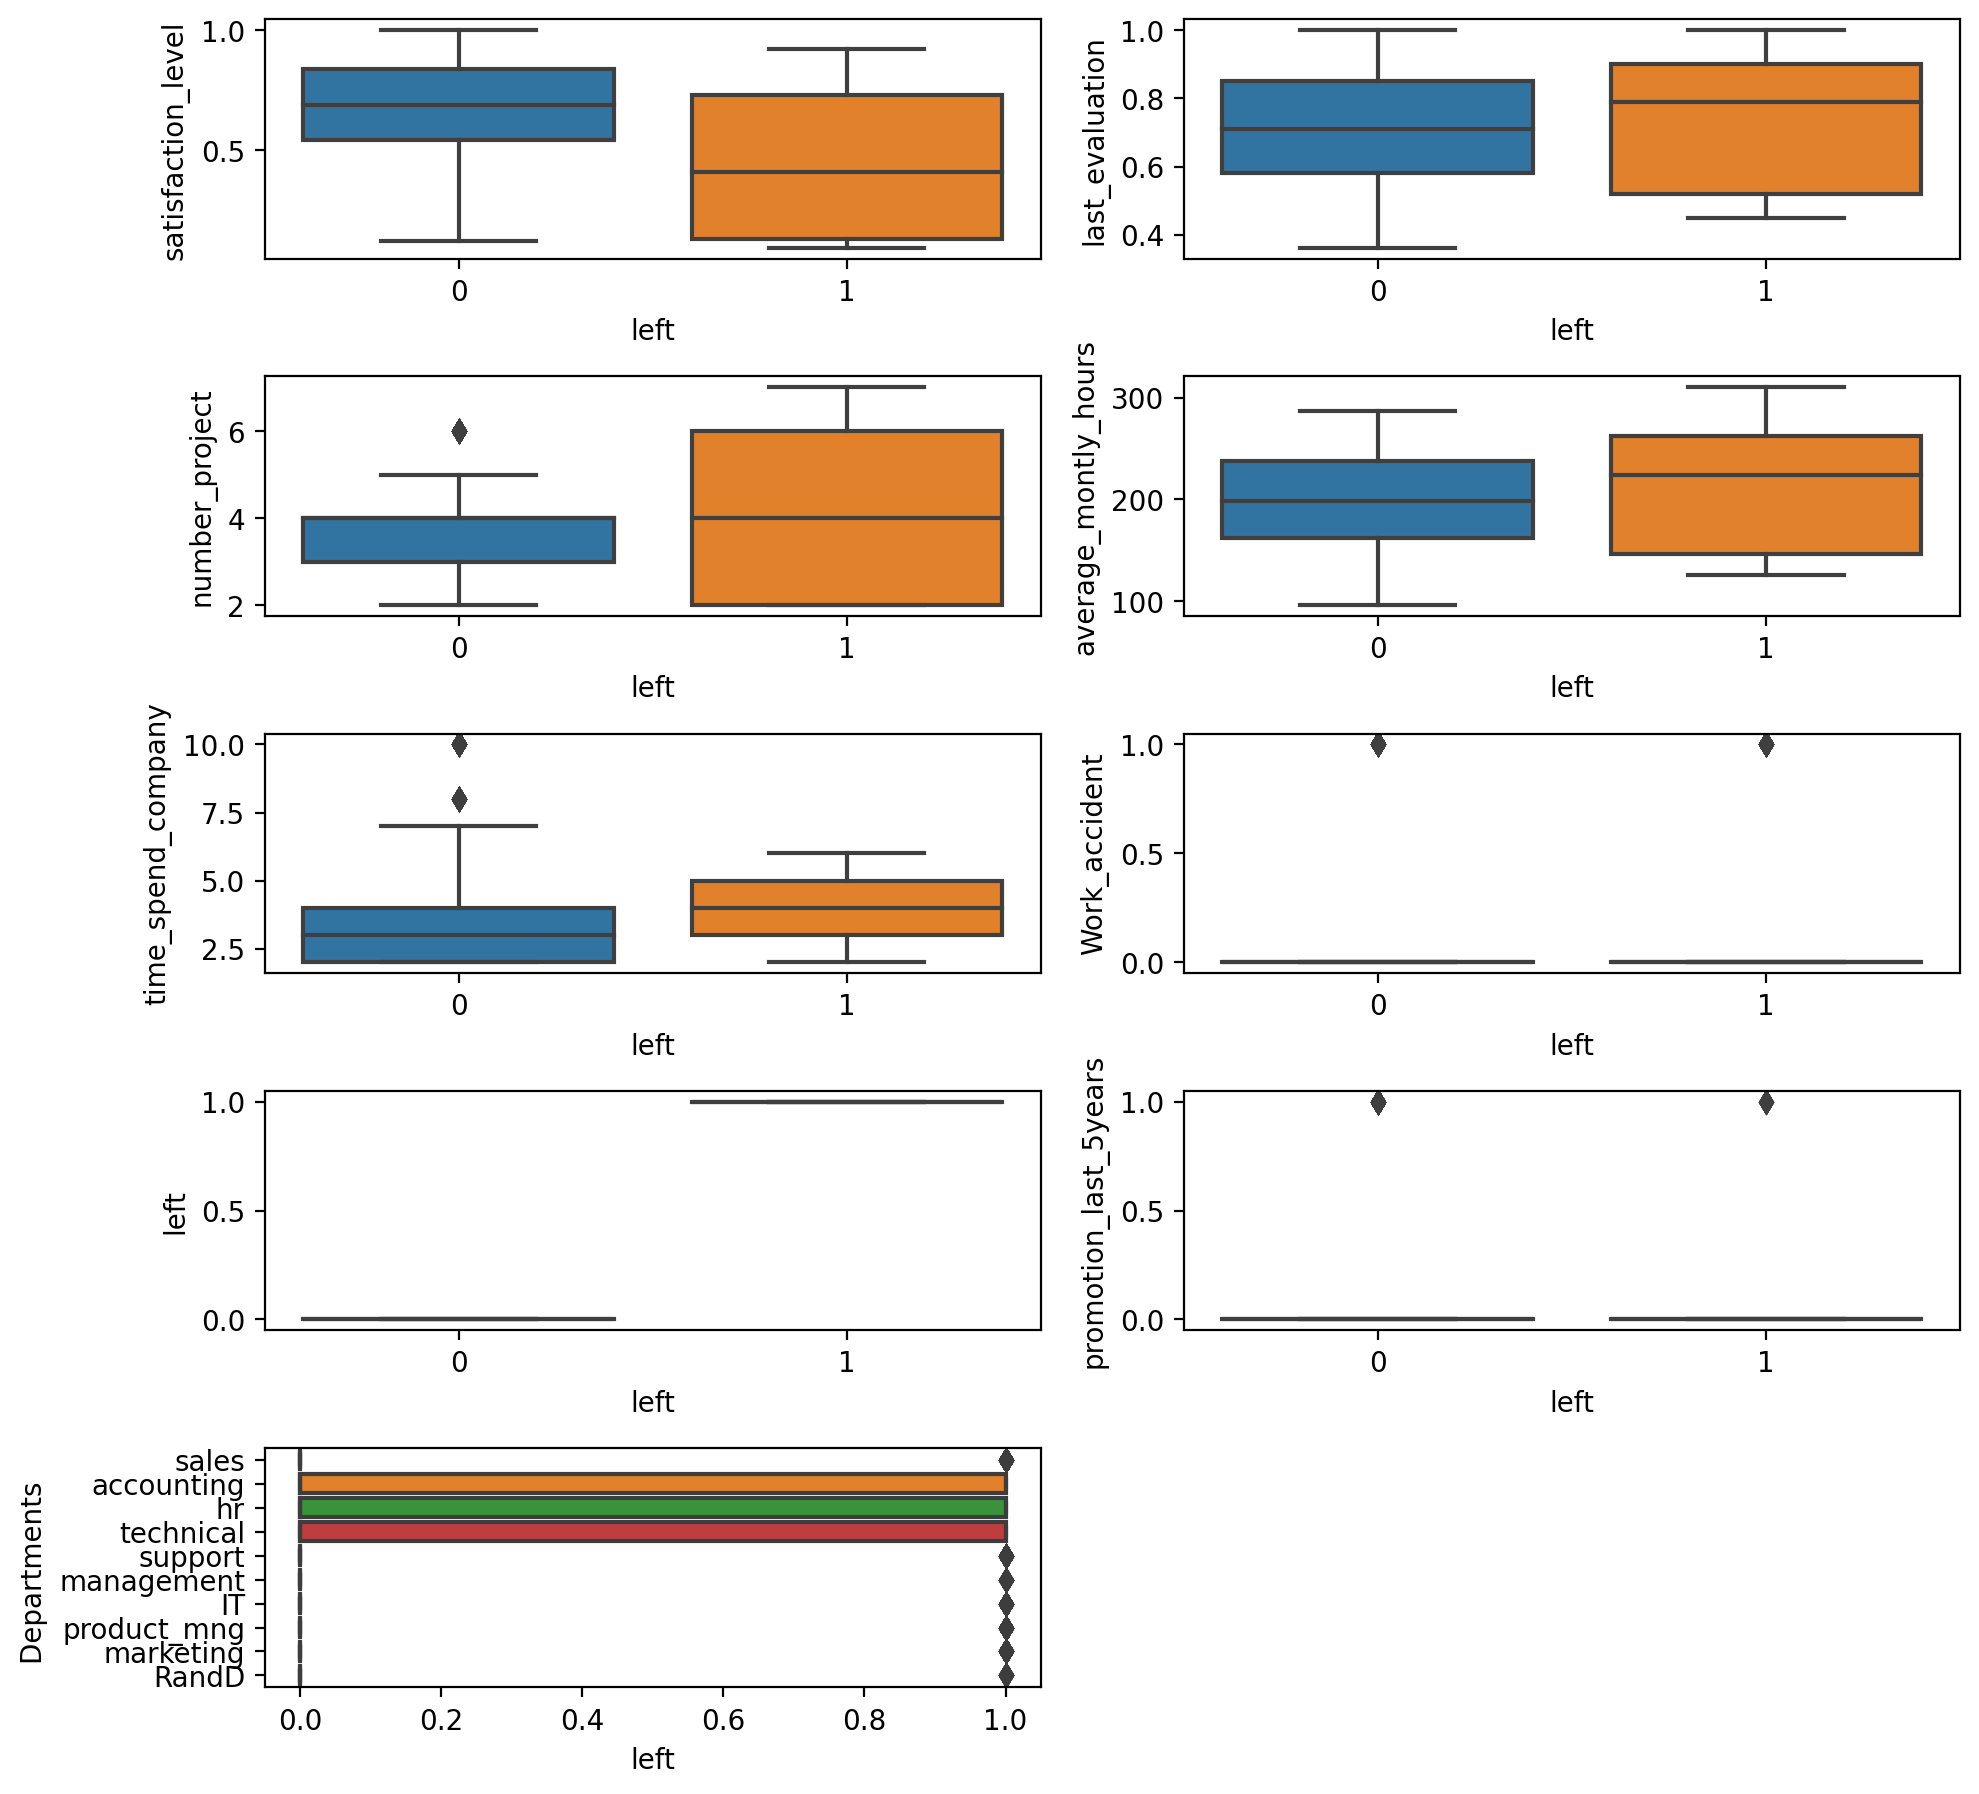

In [29]:
fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.boxplot(y= df[col], x = df["left"], data=df)
plt.tight_layout();

array([[<AxesSubplot:title={'center':'satisfaction_level'}>,
        <AxesSubplot:title={'center':'last_evaluation'}>,
        <AxesSubplot:title={'center':'number_project'}>],
       [<AxesSubplot:title={'center':'average_montly_hours'}>,
        <AxesSubplot:title={'center':'time_spend_company'}>,
        <AxesSubplot:title={'center':'Work_accident'}>],
       [<AxesSubplot:title={'center':'left'}>,
        <AxesSubplot:title={'center':'promotion_last_5years'}>,
        <AxesSubplot:>]], dtype=object)

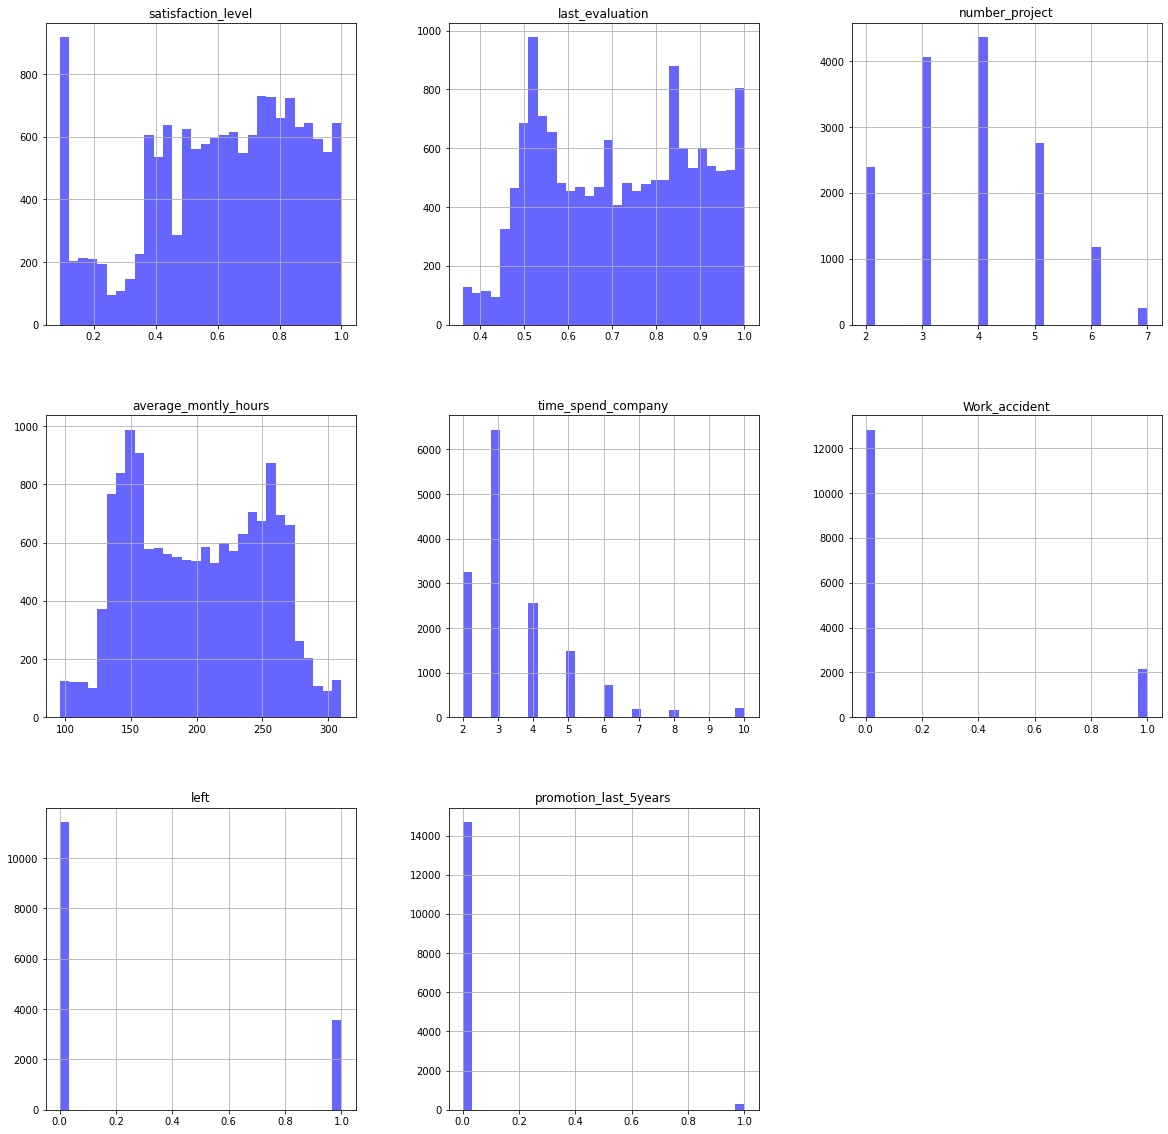

In [30]:
df.hist(bins = 30, figsize = (20, 20), color = 'b', alpha = 0.6)

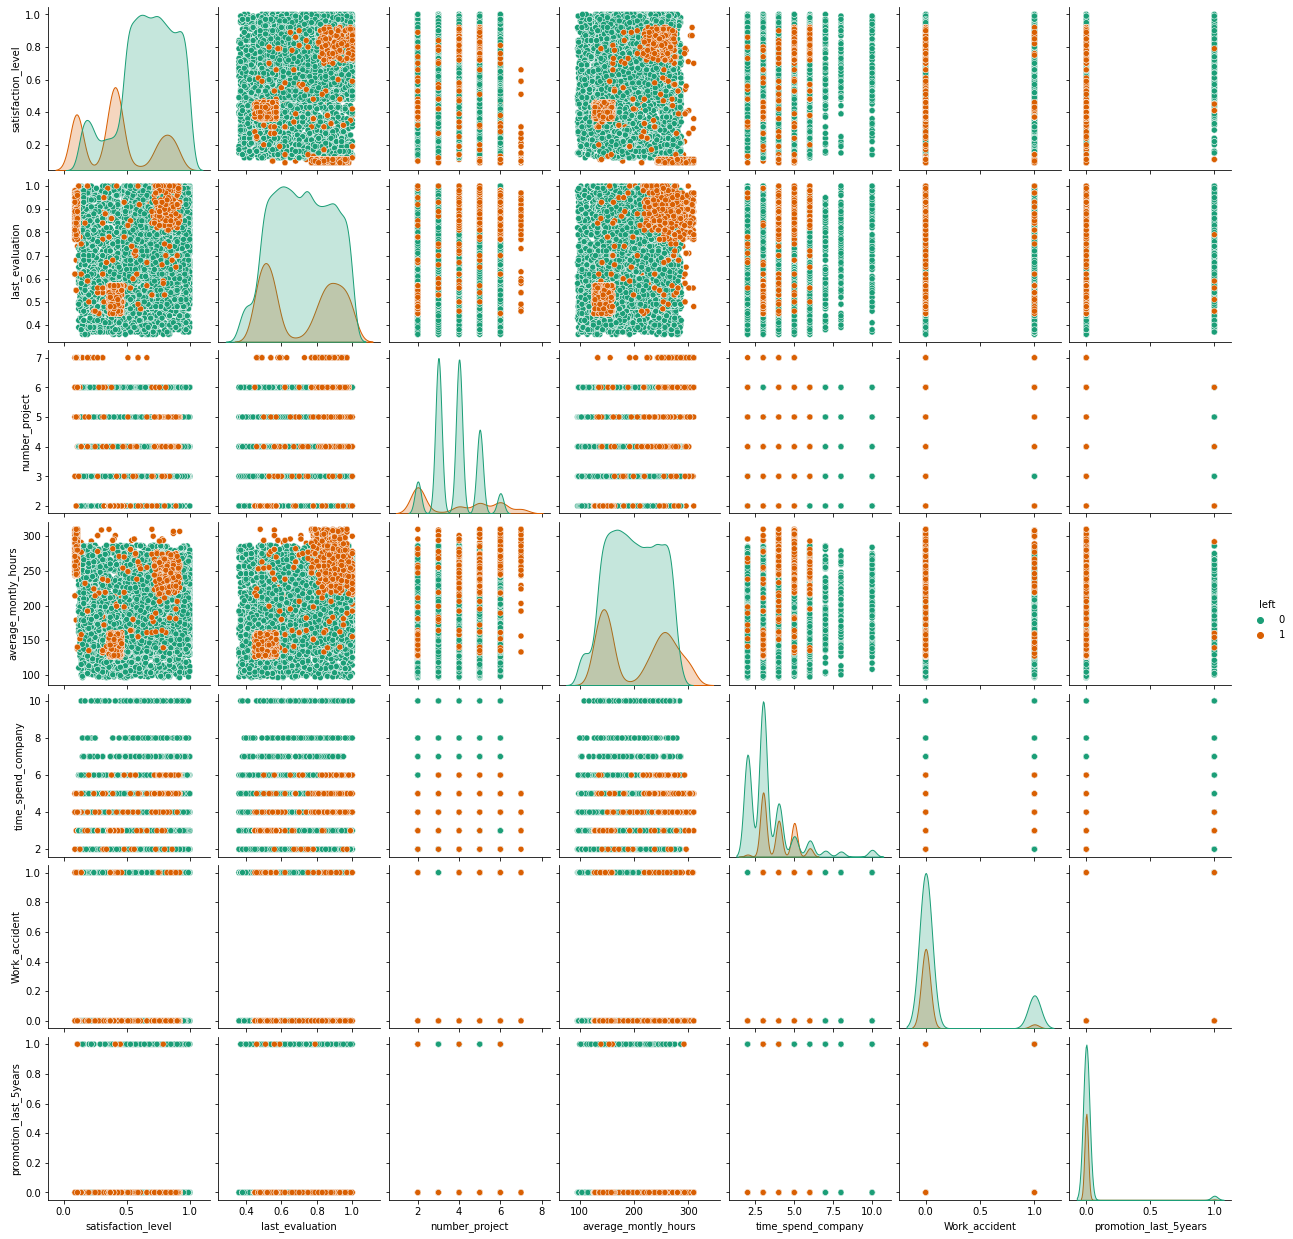

In [31]:
sns.pairplot(df,hue='left',palette='Dark2')
plt.show();

In [32]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

Departments                   : ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
salary                        : ['low' 'medium' 'high']


## Encoding Scaling

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

In [34]:
print(df.shape)

df.head()

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [35]:
df['salary']=le.fit_transform(df['salary'])
df['Departments ']=le.fit_transform(df['Departments '])

le_count = 0

for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

In [36]:
# df = pd.get_dummies(df, drop_first=True)

In [37]:
print(df.shape)

df.head()

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 5))
col = list(df.columns)
col.remove('left')
for col in col:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['left'] = pd.to_numeric(df['left'], downcast='float')

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,1.593407,1.328125,0.0,1.425234,0.625,0.0,1.0,0.0,3.888889,2.5
1,3.901099,3.906250,3.0,3.878505,2.500,0.0,1.0,0.0,3.888889,5.0
2,0.109890,4.062500,5.0,4.112150,1.250,0.0,1.0,0.0,3.888889,5.0
3,3.461538,3.984375,3.0,2.967290,1.875,0.0,1.0,0.0,3.888889,2.5
4,1.538462,1.250000,0.0,1.471963,0.625,0.0,1.0,0.0,3.888889,2.5


In [39]:
print(df.shape)

df.head()

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,1.593407,1.328125,0.0,1.425234,0.625,0.0,1.0,0.0,3.888889,2.5
1,3.901099,3.906250,3.0,3.878505,2.500,0.0,1.0,0.0,3.888889,5.0
2,0.109890,4.062500,5.0,4.112150,1.250,0.0,1.0,0.0,3.888889,5.0
3,3.461538,3.984375,3.0,2.967290,1.875,0.0,1.0,0.0,3.888889,2.5
4,1.538462,1.250000,0.0,1.471963,0.625,0.0,1.0,0.0,3.888889,2.5


In [40]:
target = df['left'].copy()

## K-means Clustering

In [41]:
from sklearn.cluster import KMeans

In [42]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(df)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

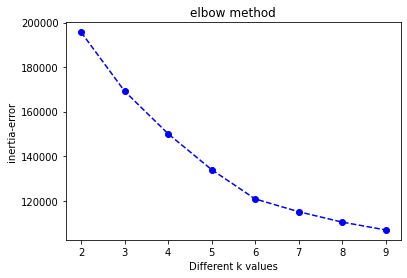

In [43]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [44]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.30982011902019607
For n_clusters=3, the silhouette score is 0.21025759366787414
For n_clusters=4, the silhouette score is 0.18075318142086721
For n_clusters=5, the silhouette score is 0.20647602476650892
For n_clusters=6, the silhouette score is 0.21429459046683375
For n_clusters=7, the silhouette score is 0.2134162075643122
For n_clusters=8, the silhouette score is 0.20041913400125463


In [45]:
left = df.groupby('left')

left

In [46]:
left_emp =  df[['satisfaction_level', 'last_evaluation']][df.left == 1]

In [47]:
kmeans = KMeans(n_clusters = 3, random_state = 42).fit(left_emp)

In [48]:
left_emp['label'] = kmeans.labels_

In [49]:
left_emp['label']

0        0
1        1
2        2
3        1
4        0
        ..
14994    0
14995    0
14996    0
14997    2
14998    0
Name: label, Length: 3571, dtype: int32

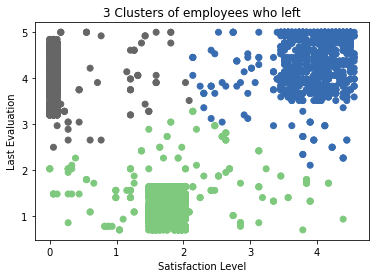

In [50]:
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

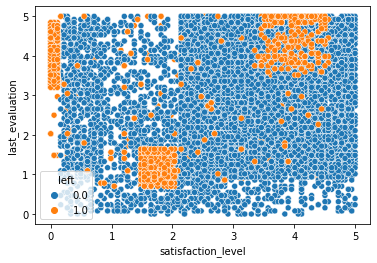

In [51]:
sns.scatterplot(data = df, x = 'satisfaction_level', y = 'last_evaluation', hue = 'left');

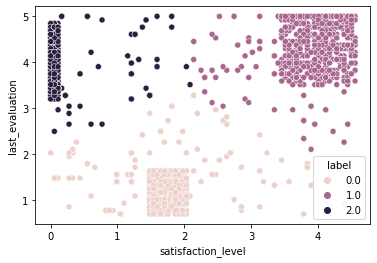

In [52]:
sns.scatterplot(data = df, x = 'satisfaction_level', y = 'last_evaluation', hue = left_emp['label']);

In [53]:
from sklearn.neighbors import BallTree

def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

## Train-Test Split

In [54]:
X = df.drop('left',axis=1)
y = df['left']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

In [57]:
from sklearn import metrics


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9736666666666667
Precision: 0.9617083946980854
Recall: 0.9249291784702549


In [58]:
X.shape

(14999, 9)

In [59]:
hopkins(X, X.shape[0])

0.12723598883449946

In [60]:
hopkins(X, 50)

0.10912059381146431

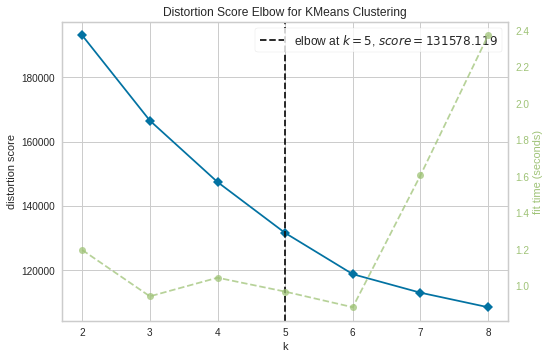

In [61]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof();

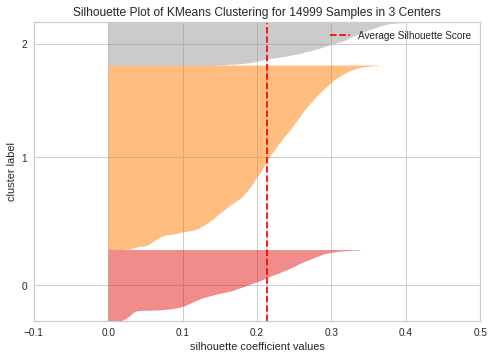

In [62]:
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)          
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    
visualizer.poof();

In [63]:
visualizer.silhouette_samples_

array([0.20839917, 0.18558758, 0.12326735, ..., 0.24910907, 0.17582664,
       0.25322285])

In [65]:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [68]:
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [71]:
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [69]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [77]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,99.18,0.31,99.17,0.19
3,KNN,97.60,0.47,95.11,0.66
4,Decision Tree Classifier,97.55,0.32,97.87,0.37
2,SVM,97.42,0.46,96.10,0.45
5,Gaussian NB,85.01,1.57,79.57,1.89
0,Logistic Regression,81.67,1.32,75.08,1.18


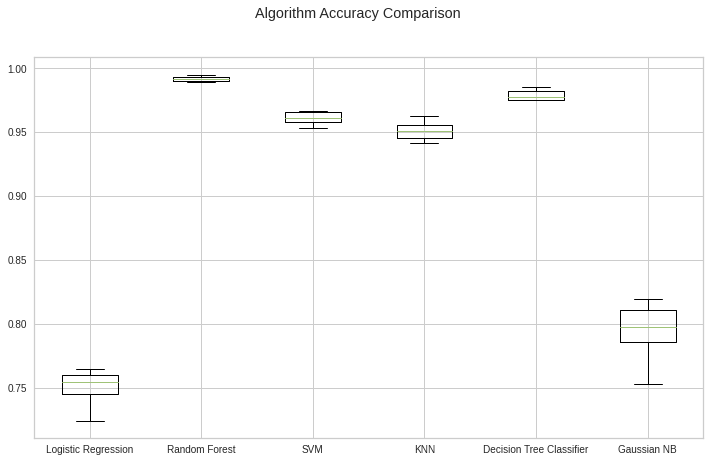

In [80]:
fig = plt.figure(figsize=(12, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()